In [114]:
import numpy
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Make Sample Dataset

In [132]:
data_size = 10000
data = pandas.DataFrame({
    'x1': numpy.random.randn(data_size),
    'x2': numpy.random.randn(data_size),
    'x3': numpy.random.randn(data_size),
})
data['y'] = 5 * data['x1'] - 3 * data['x2'] + 2 * data['x3'] + 7
data

,x1,x2,x3,y
0,0.442728,-0.466823,0.019018,10.652145
1,-0.269330,-0.255254,-0.838439,4.742233
2,-0.367312,1.346229,0.781865,2.688481
3,-0.840515,0.281029,-0.185812,1.582714
4,-1.107240,1.449288,-0.422004,-3.728075
...,...,...,...,...
9995,1.842394,0.033313,0.358476,16.828983
9996,0.546766,1.451038,0.008808,5.398331
9997,1.330875,0.035292,0.415464,14.379426
9998,-0.729073,0.024608,-0.825147,1.630515


# Define Linear Model using Deep Neural Network

In [133]:
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size, bias=True)
        
    def forward(self, x):
        return self.linear(x)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(data[['x1', 'x2', 'x3']], data['y'], test_size=0.2, random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 3) (8000,)
(2000, 3) (2000,)


In [135]:
N_EPOCH = 1000

model = LinearModel(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

X_train_torch = torch.from_numpy(X_train.to_numpy()).float()
X_test_torch = torch.from_numpy(X_test.to_numpy()).float()
y_train_torch = torch.from_numpy(y_train.to_numpy()).reshape(-1, 1).float()
y_test_torch = torch.from_numpy(y_test.to_numpy()).reshape(-1, 1).float()

model.train()


for epoch in range(N_EPOCH):
    optimizer.zero_grad()

    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)

    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch: {epoch}, loss: {loss.item()}')
        

epoch: 0, loss: 97.57671356201172
epoch: 100, loss: 1.6265205144882202
epoch: 200, loss: 0.02757701836526394
epoch: 300, loss: 0.0004755765839945525
epoch: 400, loss: 8.343934496224392e-06
epoch: 500, loss: 1.4877058163165202e-07
epoch: 600, loss: 2.769684925851834e-09
epoch: 700, loss: 2.898790651961747e-10
epoch: 800, loss: 2.898790651961747e-10
epoch: 900, loss: 2.898790651961747e-10


In [136]:
model.eval()
with torch.no_grad():
    pred_torch = model(X_test_torch)
print(pred_torch)

tensor([[ 5.8182],
        [-1.0414],
        [ 6.2879],
        ...,
        [ 8.3331],
        [10.4266],
        [ 3.1517]])


# Define Linear Model using Sci-kit learn

In [137]:
LR = LinearRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
print(pred)

[ 5.818214   -1.04139125  6.28790094 ...  8.33307354 10.4266238
  3.15174786]


# Compare the result between DNN and Sklearn

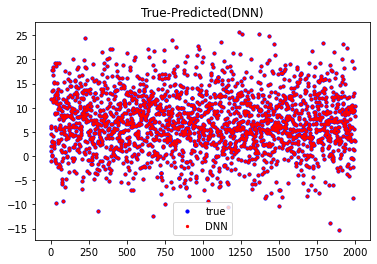

In [151]:
plt.scatter(range(len(y_test)), y_test, color='b', s=10, label='true')
plt.scatter(range(len(y_test)), pred_torch, color='r', s=5, label='DNN')
plt.title('True-Predicted(DNN)')
plt.legend()
plt.show()

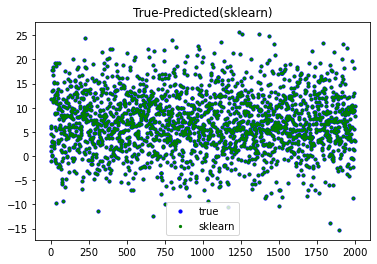

In [148]:
plt.scatter(range(len(y_test)), y_test, color='b', s=10, label='true')
plt.scatter(range(len(y_test)), pred, color='g', s=5, label='sklearn')
plt.title('True-Predicted(sklearn)')
plt.legend()
plt.show()

In [131]:
print(LR.coef_, LR.intercept_)

[ 5. -3.  2.] 7.0
